In [7]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

#Typical image processing pipelines

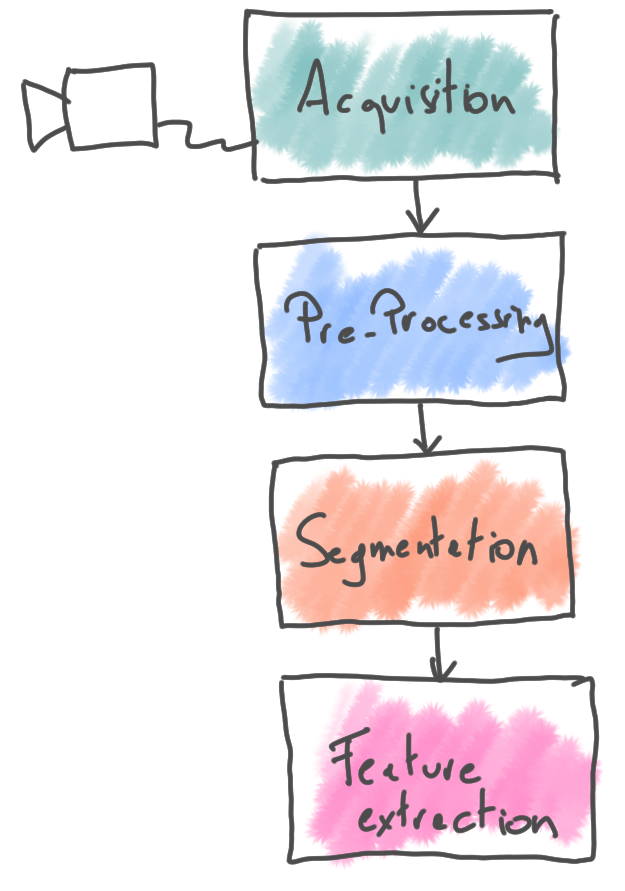

In [8]:
Image('http://homepages.ulb.ac.be/~odebeir/data/ip_chain.png')

##Examples
 
 
 

#Other approaches
 
 
 

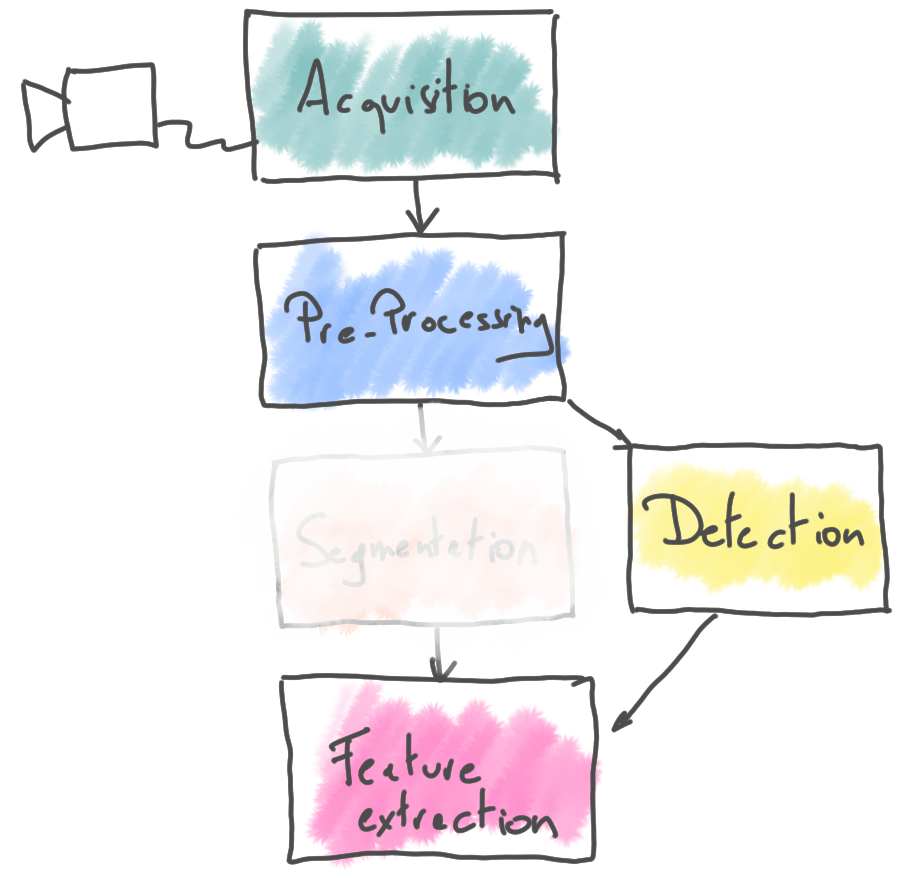

In [9]:
Image('http://homepages.ulb.ac.be/~odebeir/data/ip_chain2.png')

##Hough transform

One typical task in image processing is the detection of specific features such as lines. Lines are often present in images where man made structures are present. In the following image, many lines are present, some are continuous (red, green, blue) other are discontinuous (orange) but are made of aligned segments.

Instead of trying to connect touching point that may be on the same line, as one would do with a classical edge detection techniques, Hough transform is grouping pixels that belong to a same line even if line is segmented.

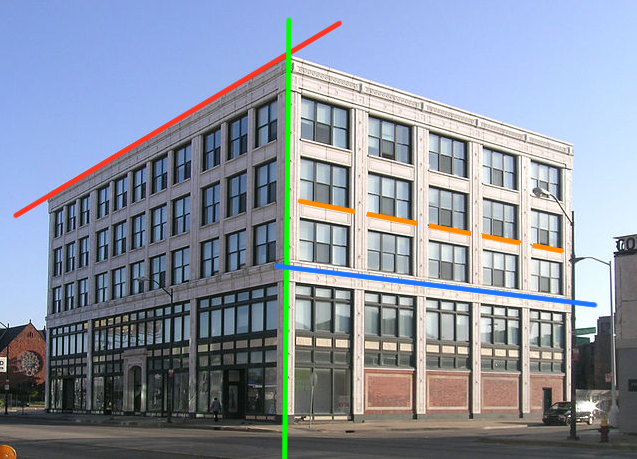

In [16]:
Image('http://homepages.ulb.ac.be/~odebeir/data/hough3.png')

<sup>based on [wikimedia commons](https://commons.wikimedia.org/wiki/File:Garfield_Building_Detroit.jpg)

Consider the 2D line $P,Q$, this line can be expressed as:

$$y = ax+b$$

with $a$ and $b$ such tath this equation is satified both for $(x_0,y_0)$ and $(x_1,y_1)$.

All the point of the image located on the line will statisfy this equation.

We can use the normal line representation:

$$x \cos(\theta) + y \sin(\theta) = \rho$$

with $\theta$ the angle to the origin ot the normal to the line and $\rho$ its distance to the origin, so a line is defined by its two parameters $(\rho,\theta)$.

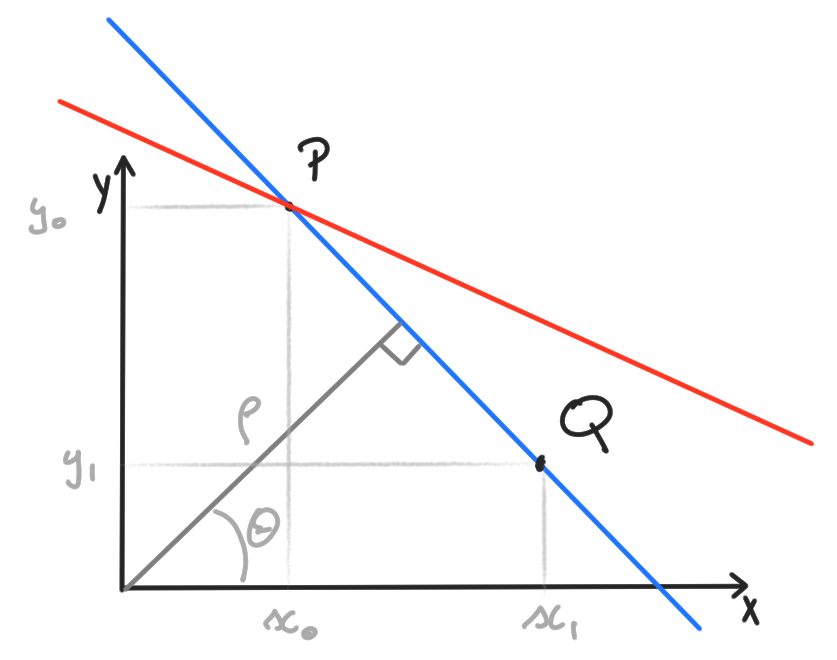

In [12]:
Image('http://homepages.ulb.ac.be/~odebeir/data/hough1.png')

The point $P$ will also belong to the red line that is defined by two others $(\rho_r,\theta_r)$ parameters, ..., infact, $P$ belong to an infinity of lines such that:

$$x_0 \cos(\theta) + y_0 \sin(\theta) = \rho$$

is statisfied.



>see also:
* Hough transform [DIP](../00-Preface/06-References.ipynb#[DIP]) p432

##Pattern matching 